# Line Plot - Annual Sales Fluctuation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Install kaleido for plotly image export
!pip install -U kaleido
# Upgrade plotly to a compatible version
!pip install "plotly>=6.1.1"

import kaleido # Import kaleido after installation

# Ensure Kaleido can find Chrome
kaleido.get_chrome_sync()

PosixPath('/usr/local/lib/python3.12/dist-packages/choreographer/cli/browser_exe/chrome-linux64/chrome')

### Execute the following code, replacing 'YOUR_DATA_URL' with the actual URL you have for your data file.

In [ ]:
# Replace 'YOUR_DATA_URL' with the actual URL you received
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv'
df = pd.read_csv(url)

# Display the first few rows to verify the data loaded correctly
print(df.head())

        Date  Year Month  Recession  Consumer_Confidence  Seasonality_Weight  \
0  1/31/1980  1980   Jan          1               108.24                0.50   
1  2/29/1980  1980   Feb          1                98.75                0.75   
2  3/31/1980  1980   Mar          1               107.48                0.20   
3  4/30/1980  1980   Apr          1               115.01                1.00   
4  5/31/1980  1980   May          1                98.72                0.20   

       Price  Advertising_Expenditure  Competition     GDP  Growth_Rate  \
0  27483.571                     1558            7  60.223     0.010000   
1  24308.678                     3048            4  45.986    -0.309594   
2  28238.443                     3137            3  35.141    -0.308614   
3  32615.149                     1653            7  45.673     0.230596   
4  23829.233                     1319            4  52.997     0.138197   

   unemployment_rate  Automobile_Sales     Vehicle_Type        City 

###

### Once you've successfully loaded the data in previous cell, the df variable will be defined, and you can now run the code for Task without error.

<Figure size 1000x600 with 0 Axes>

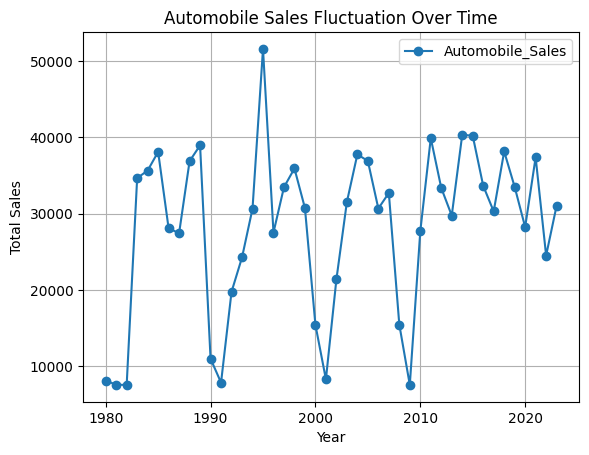

In [ ]:
## Task 1.1 Code
df_sales = df.groupby('Year')['Automobile_Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
df_sales.plot(x='Year', y='Automobile_Sales', kind='line', marker='o')
plt.title('Automobile Sales Fluctuation Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.savefig('Line_plot_1.png')
plt.show()

# Sales Trends by Vehicle Type

### Group the data by both Year and Vehicle_Type and sum the Automobile_Sales.

In [ ]:
## Task 1.2 Code - Data Preparation
df_type_sales = df.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().reset_index()

### Use the Seaborn library's lineplot function to generate separate lines for each Vehicle_Type. We will also add vertical spans to visually highlight the Recession years (assuming your Recession column uses 1 for recession and 0 otherwise)

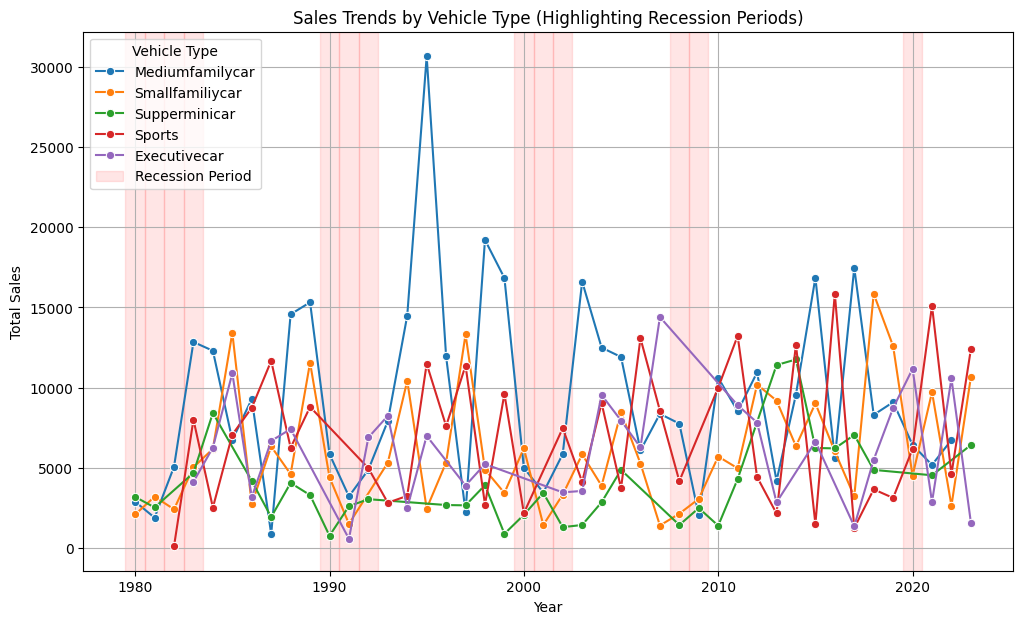

In [ ]:
## Task 1.2 Code - Plot Generation
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_type_sales, x='Year', y='Automobile_Sales', hue='Vehicle_Type', marker='o')

# Highlighting recession periods (Requires 'Recession' column)
# Find the unique years identified as recession years (Recession == 1)
recession_years = df[df['Recession'] == 1]['Year'].unique()

# Add vertical shading (axvspan) for the recession years
for i, year in enumerate(recession_years):
    # This draws a vertical shaded area for the year
    plt.axvspan(year - 0.5, year + 0.5, color='red', alpha=0.1,
                label='Recession Period' if i == 0 else "") # Label only the first one to avoid duplicate legends

plt.title('Sales Trends by Vehicle Type (Highlighting Recession Periods)')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Vehicle Type', loc='upper left')
plt.grid(True)
plt.savefig('Line_plot_2.png')
plt.show()

# Bar Chart - Sales Comparison (Recession vs. Non-Recession)

### To compare the sales trend, we need to calculate the average Automobile_Sales grouped by both the Recession indicator and the Vehicle_Type.

In [ ]:
## Task 1.3 Code - Data Preparation
# Group by Recession and Vehicle_Type to find the mean sales
df_rec_sales = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Optional: Replace the 0/1 indicator with descriptive labels for better readability on the chart
df_rec_sales['Recession'] = df_rec_sales['Recession'].replace({0: 'Non-Recession', 1: 'Recession'})

### Use the Seaborn barplot function, setting Recession as the hue parameter to create grouped bars.

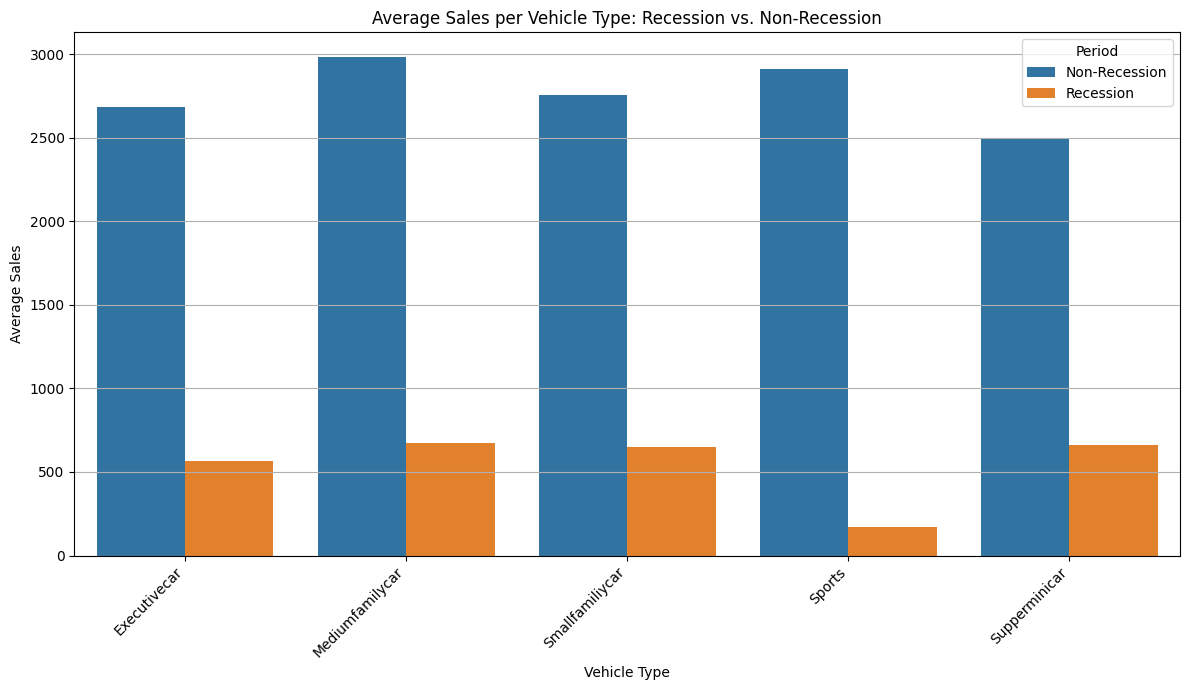

In [ ]:
## Task 1.3 Code - Plot Generation
plt.figure(figsize=(12, 7))
# Create the grouped bar chart
sns.barplot(data=df_rec_sales,
            x='Vehicle_Type',
            y='Automobile_Sales',
            hue='Recession')

plt.title('Average Sales per Vehicle Type: Recession vs. Non-Recession')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Sales')
plt.xticks(rotation=45, ha='right') # Rotate labels for better fit
plt.legend(title='Period')
plt.grid(axis='y') # Only horizontal grid lines
plt.tight_layout() # Adjust plot to fit rotated labels
plt.savefig('Bar_Chart.png')
plt.show()

# Subplots - GDP Variation (Recession vs. Non-Recession)

### We need to calculate the average GDP for each year, separated by whether that year was in a recession or not.

In [ ]:
## Task 1.4 Code - Data Preparation
# Group by Year and Recession to find the mean GDP
df_gdp = df.groupby(['Year', 'Recession'])['GDP'].mean().reset_index()

# Separate data into two DataFrames for plotting ease
df_gdp_rec = df_gdp[df_gdp['Recession'] == 1]
df_gdp_non_rec = df_gdp[df_gdp['Recession'] == 0]

### use matplotlib.pyplot.subplots to create two line plots side-by-side.

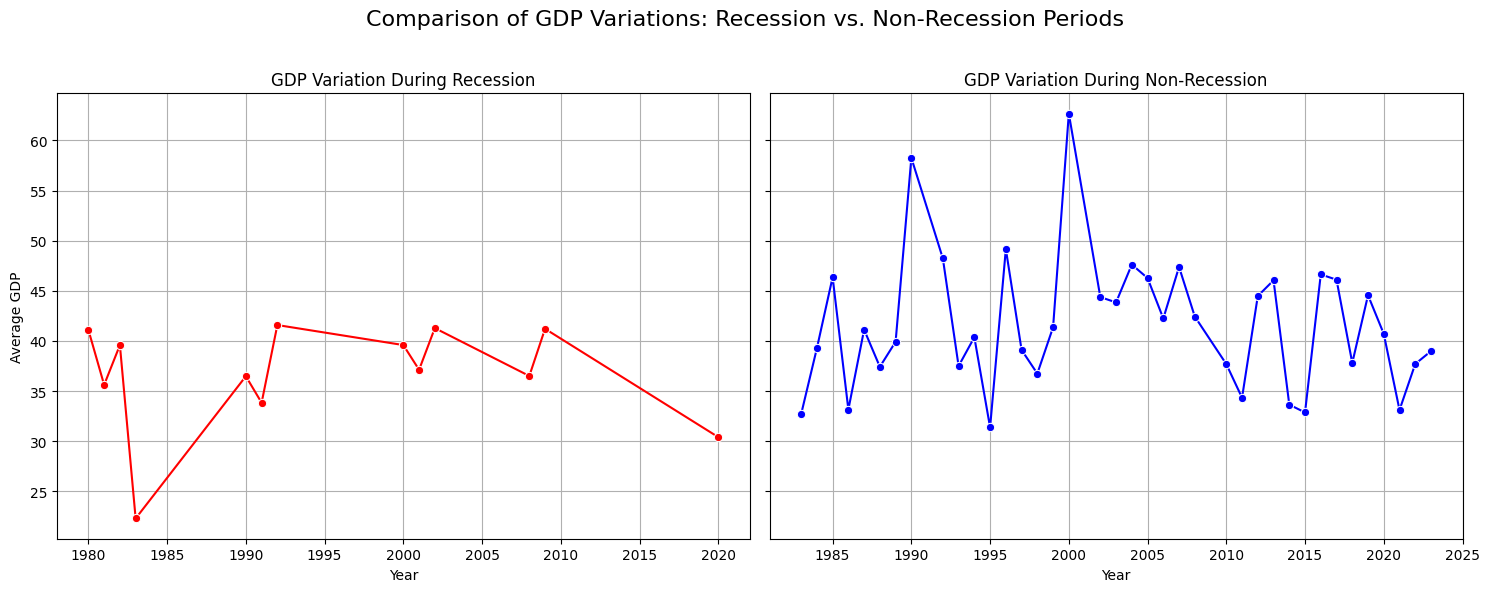

In [ ]:
## Task 1.4 Code - Plot Generation
# Create a figure with 1 row and 2 columns. sharey=True ensures the y-axis scale is the same.
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# --- Plot 1: Recession GDP ---
sns.lineplot(ax=axes[0], data=df_gdp_rec, x='Year', y='GDP', marker='o', color='red')
axes[0].set_title('GDP Variation During Recession')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Average GDP')
axes[0].grid(True)

# --- Plot 2: Non-Recession GDP ---
sns.lineplot(ax=axes[1], data=df_gdp_non_rec, x='Year', y='GDP', marker='o', color='blue')
axes[1].set_title('GDP Variation During Non-Recession')
axes[1].set_xlabel('Year')
# axes[1].set_ylabel('Average GDP') # Y-label is automatically shared
axes[1].grid(True)

# Add a main title for the entire figure
plt.suptitle('Comparison of GDP Variations: Recession vs. Non-Recession Periods', fontsize=16)

# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('Subplot.png')
plt.show()

# Bubble Plot - Seasonality Impact

### We need to group the data to calculate the average sales for each combination of Seasonality and Year.

In [ ]:
## Task 1.5 Code - Data Preparation
# Group by Seasonality and Year to find the mean Automobile_Sales.
# We will use this mean sales value for the bubble size.
df_bubble = df.groupby(['Seasonality_Weight', 'Year'])['Automobile_Sales'].mean().reset_index()

### We will map the variables as follows:

    X-axis: Year

    Y-axis: Automobile_Sales (The dependent variable)

    Size: Automobile_Sales (The magnitude of sales will determine the bubble size)

    Color: Seasonality (To visually distinguish the different seasons, e.g., Q1, Q2, etc.)

In [ ]:
## Task 1.5 Code - Plot Generation
import plotly.express as px # Ensure Plotly Express is imported

fig = px.scatter(df_bubble,
                 x='Year',
                 y='Automobile_Sales',
                 size='Automobile_Sales', # Use sales volume to determine bubble size
                 color='Seasonality_Weight',
                 hover_name='Seasonality_Weight',
                 title='Impact of Seasonality on Automobile Sales (Bubble Chart)')

# Plotly automatically saves the figure to the specified file name
fig.write_image('Bubble.png')
fig.show()

In [ ]:
!sudo apt update && sudo apt-get install libnss3 libatk-bridge2.0-0 libcups2 libxcomposite1 libxdamage1 libxfixes3 libxrandr2 libgbm1 libxkbcommon0 libpango-1.0-0 libcairo2 libasound2

Hit:1 https://cli.github.com/packages stable InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,153 kB]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,832 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main all 

# Scatter Plot - Price vs. Sales during Recession

### Filter main DataFrame df to include only the rows where the Recession column indicates a recession (usually where Recession == 1).

In [ ]:
## Task 1.6 Code - Data Preparation
# Filter the DataFrame for only Recession periods
df_recession = df[df['Recession'] == 1]

### Use matplotlib.pyplot.scatter() to plot Price on the x-axis and Automobile_Sales on the y-axis.

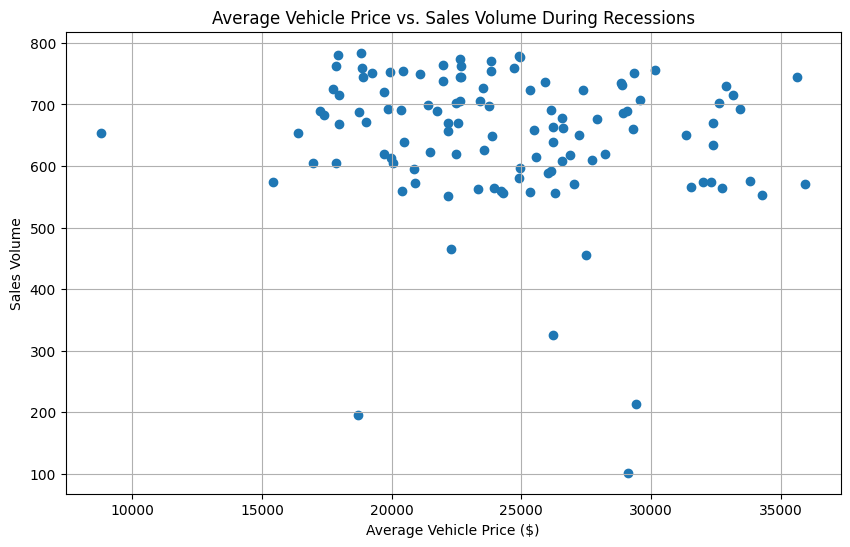

In [ ]:
## Task 1.6 Code - Plot Generation
plt.figure(figsize=(10, 6))

# Create the scatter plot
plt.scatter(df_recession['Price'], df_recession['Automobile_Sales'])

plt.title('Average Vehicle Price vs. Sales Volume During Recessions')
plt.xlabel('Average Vehicle Price ($)')
plt.ylabel('Sales Volume')
plt.grid(True)
plt.savefig('Scatter.png')
plt.show()

# Pie Chart 1 - Advertising Expenditure Comparison

### Group the data by the Recession indicator and calculate the sum of Advertising_Expenditure for each period.

In [ ]:
## Task 1.7 Code - Data Preparation
# Summing total advertising expenditure for each period
adv_expenditure = df.groupby('Recession')['Advertising_Expenditure'].sum().reset_index()

# Replace the 0/1 indicator with descriptive labels
adv_expenditure['Recession'] = adv_expenditure['Recession'].replace({0: 'Non-Recession', 1: 'Recession'})

### We'll use Matplotlib's pie() function to visualize the proportions.

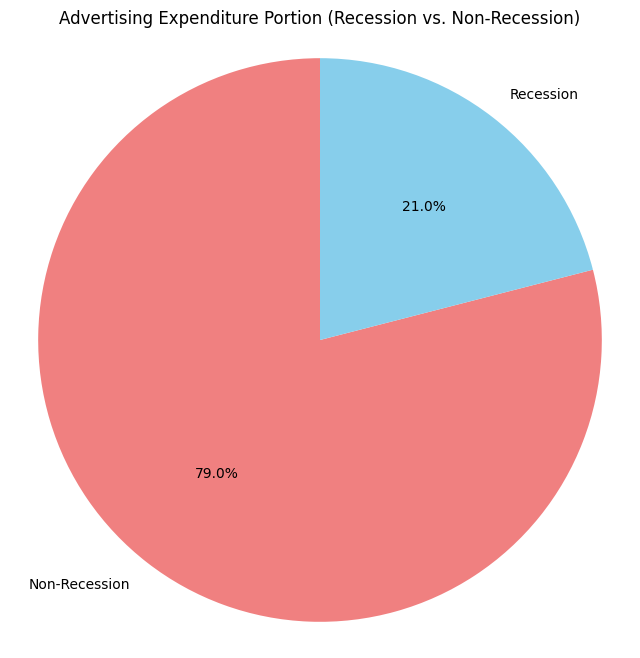

In [ ]:
## Task 1.7 Code - Plot Generation
plt.figure(figsize=(8, 8))

plt.pie(adv_expenditure['Advertising_Expenditure'],
        labels=adv_expenditure['Recession'],
        autopct='%1.1f%%', # Format for displaying percentages
        startangle=90,
        colors=['lightcoral', 'skyblue'])

plt.title('Advertising Expenditure Portion (Recession vs. Non-Recession)')
plt.axis('equal') # Ensures the pie chart is drawn as a perfect circle
plt.savefig('Pie_1.png')
plt.show()

# Pie Chart 2 - Advertising Expenditure by Vehicle Type (Recession Only)

### First, filter the main DataFrame df to include only the recession periods (Recession == 1). Then, group this filtered data by Vehicle_Type and calculate the sum of Advertising_Expenditure.+

In [ ]:
## Task 1.8 Code - Data Preparation
# 1. Filter data for recession period only
df_recession_adv = df[df['Recession'] == 1]

# 2. Summing total advertising expenditure for each vehicle type during recession
adv_by_type = df_recession_adv.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()

### Use Matplotlib's pie() function again, using Vehicle_Type for the labels.

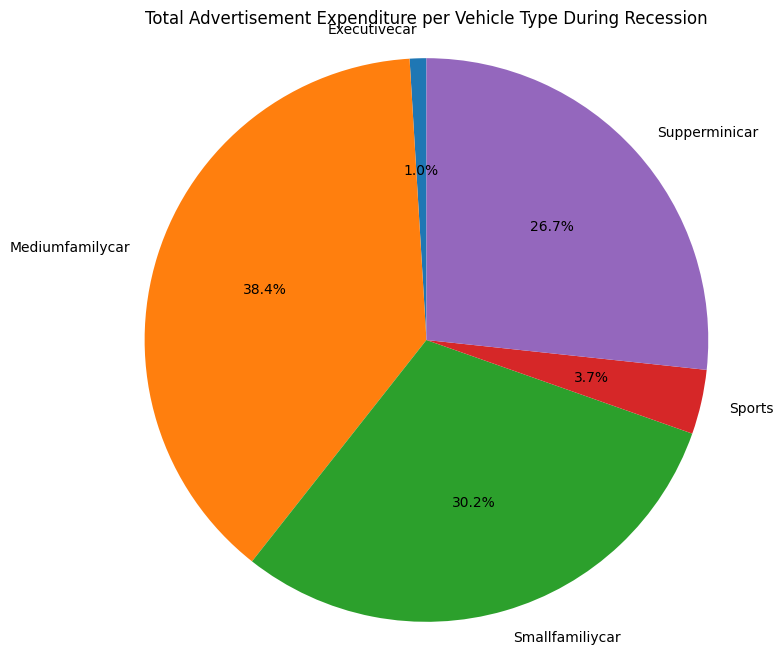

In [ ]:
## Task 1.8 Code - Plot Generation
plt.figure(figsize=(8, 8))

plt.pie(adv_by_type['Advertising_Expenditure'],
        labels=adv_by_type['Vehicle_Type'],
        autopct='%1.1f%%', # Format for displaying percentages
        startangle=90)

plt.title('Total Advertisement Expenditure per Vehicle Type During Recession')
plt.axis('equal') # Ensures the pie chart is drawn as a perfect circle
plt.savefig('Pie_2.png')
plt.show()

# Line Plot - Unemployment Effect during Recession

### We need two dataframes, both filtered for the recession period (Recession == 1):

    Sales Data: Grouped by Year and Vehicle_Type to show sales trends.

    Unemployment Data: Grouped by Year to show the average unemployment rate trend.

In [ ]:
## Task 1.9 Code - Data Preparation
# Filter data for recession period only
df_recession = df[df['Recession'] == 1]

# 1. Sales data (grouped by Year and Vehicle Type)
df_effect = df_recession.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().reset_index()

# 2. Unemployment data (grouped by Year)
df_unemp = df_recession.groupby('Year')['unemployment_rate'].mean().reset_index()

### We'll use Matplotlib and Seaborn, and then create a second Y-axis using plt.twinx().

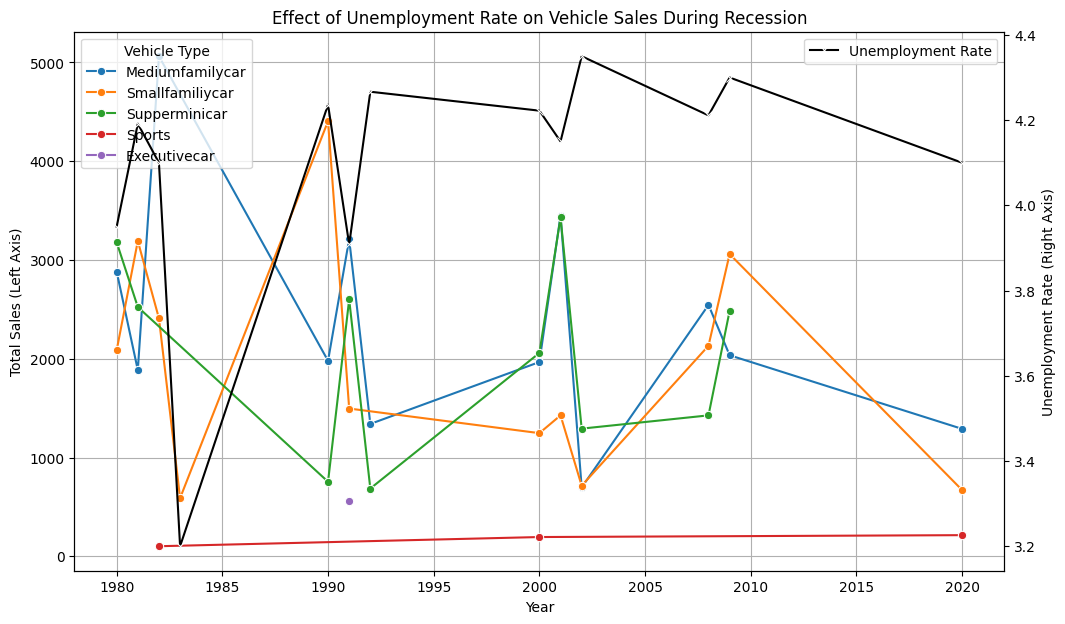

In [ ]:
## Task 1.9 Code - Plot Generation
plt.figure(figsize=(12, 7))

# --- Plot 1: Sales Trends (Left Y-Axis) ---
ax1 = sns.lineplot(data=df_effect,
                   x='Year',
                   y='Automobile_Sales',
                   hue='Vehicle_Type',
                   marker='o')

ax1.set_title('Effect of Unemployment Rate on Vehicle Sales During Recession')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Sales (Left Axis)')
ax1.grid(True)
# Move sales legend to avoid overlap
ax1.legend(title='Vehicle Type', loc='upper left')


# --- Plot 2: Unemployment Rate (Right Y-Axis) ---
ax2 = plt.twinx() # Create a second Y-axis sharing the same X-axis

sns.lineplot(data=df_unemp,
             x='Year',
             y='unemployment_rate',
             marker='x',
             color='black',
             ax=ax2,
             label='Unemployment Rate') # Plot on the second axis

ax2.set_ylabel('Unemployment Rate (Right Axis)', color='black')
ax2.tick_params(axis='y', labelcolor='black')
# Move unemployment legend to avoid overlap
ax2.legend(loc='upper right')

plt.savefig('Line_plot_3.png')
plt.show()

# Create a Dash Application and Give it a Meaningful Title

### install Dash and its core components. Then, import them.

In [ ]:
# Run this once if you haven't installed Dash:
!pip install dash
!pip install jupyter-dash  # Recommended for running Dash inside a Jupyter/Colab notebook

# Import necessary libraries
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
# from jupyter_dash import JupyterDash # Uncomment this if using Jupyter/Colab

### Initialize your Dash application. If you are running this in a Colab or Jupyter Notebook, it's often best practice to use JupyterDash (if installed) or initialize dash.Dash and then use app.run_server(mode='inline') later.

In [ ]:
# Initialize the Dash app
# If using Jupyter/Colab: app = JupyterDash(__name__)
app = dash.Dash(__name__)

# Optional: Add a style sheet for better looks (e.g., from an online CDN)
app.css.append_css({'external_url': 'https://codepen.io/chriddyp/pen/bWLwgP.css'})

### Define the basic layout using html.Div and add your title using html.H1. This will serve as the initial structure for your dashboard.

In [ ]:
# Define the application layout
app.layout = html.Div(children=[
    # The title element
    html.H1("U.S. Automobile Market Analysis Dashboard",
            style={'textAlign': 'center', 'color': '#503D36', 'fontSize': 28}),

    # Placeholder for the rest of the layout (Task 2.2 and 2.3 will go here)
    html.Div(id='input-container', children=[]),
    html.Div(id='output-container-graphs', children=[]),
])

# Run the server to view the title (we will run the server at the end of Task 2.6)
# For now, just define the layout.

# Add Dropdowns

### We will modify the app.layout from Task 2.1 to include two main input areas:

    Report Type Selection: A dropdown to choose between the two report types.

    Year Selection Container: A container (initially empty) that will hold the year dropdown, but only appears when the 'Yearly Report' is selected via a callback (Task 2.4).
  

In [ ]:
# --- Continuing from Task 2.1 ---
# Note: Ensure app = dash.Dash(__name__) and the main imports are executed.

app.layout = html.Div(children=[
    # 1. Main Title (Task 2.1)
    html.H1("U.S. Automobile Market Analysis Dashboard",
            style={'textAlign': 'center', 'color': '#503D36', 'fontSize': 28}),

    # 2. Input Container Division
    html.Div([
        # Dropdown 1: Select Report Type
        html.Label("Select Statistics:", style={'margin-right': '2em', 'font-weight': 'bold'}),
        dcc.Dropdown(
            id='select-stats',
            options=[
                {'label': 'Recession Period Statistics', 'value': 'Recession Report'},
                {'label': 'Yearly Statistics', 'value': 'Yearly Report'}
            ],
            value='Recession Report', # Default starting value
            placeholder='Select a Report Type',
            style={'width': '80%', 'padding': '3px', 'fontSize': '20px', 'textAlignLast': 'center'}
        ),
    ], style={'display': 'flex', 'padding': '2em', 'align-items': 'center'}),

    # Dropdown 2 Container: Placeholder for Year Selection (Will be populated by a callback)
    # The output from the callback will define the 'children' of this Div.
    html.Div(id='output-container-input', children=[], style={'display': 'flex', 'padding': '1em'}),

    # Placeholder for graph output (Task 2.3 will refine this)
    html.Div(id='output-container-graphs', children=[]),
])

# Add a Division for Output Display

### We will update your app.layout to include the output container right after the input containers.

In [ ]:
# --- Updated app.layout (Includes Task 2.1, 2.2, and 2.3) ---

app.layout = html.Div(children=[
    # 1. Main Title (Task 2.1)
    html.H1("U.S. Automobile Market Analysis Dashboard",
            style={'textAlign': 'center', 'color': '#503D36', 'fontSize': 28}),

    # 2. Input Container Division (Task 2.2)
    html.Div([
        # Dropdown 1: Select Report Type
        html.Label("Select Statistics:", style={'margin-right': '2em', 'font-weight': 'bold'}),
        dcc.Dropdown(
            id='select-stats',
            options=[
                {'label': 'Recession Period Statistics', 'value': 'Recession Report'},
                {'label': 'Yearly Statistics', 'value': 'Yearly Report'}
            ],
            value='Recession Report',
            placeholder='Select a Report Type',
            style={'width': '80%', 'padding': '3px', 'fontSize': '20px', 'textAlignLast': 'center'}
        ),
    ], style={'display': 'flex', 'padding': '2em', 'align-items': 'center'}),

    # 3. Year Selection Container (Placeholder)
    html.Div(id='output-container-input', children=[], style={'display': 'flex', 'padding': '1em'}),

    # 4. OUTPUT DISPLAY DIVISION (Task 2.3)
    # This is the division where the graphs will be rendered
    html.Div(id='output-container-graphs', className='chart-grid',
             style={'display': 'flex', 'flex-wrap': 'wrap', 'justify-content': 'space-around'}),
])

# Creating Callbacks

### First, we need to extract the unique years from your df DataFrame to populate the year dropdown list. Make sure you run this code block after loading your main df and before the callbacks.

In [ ]:
# Extract unique years from the DataFrame for the dropdown
year_list = [i for i in df['Year'].unique()]

### Callback 1: Update Input Container (Show/Hide Year Dropdown)

#### This callback takes the value from the main Report Type dropdown and dynamically updates the children of the output-container-input Div.

In [ ]:
# Callback to update the input container (Year Dropdown) based on report selection
@app.callback(
    Output(component_id='output-container-input', component_property='children'),
    Input(component_id='select-stats', component_property='value')
)
def update_input_container(selected_statistic):
    if selected_statistic == 'Yearly Report':
        return html.Div([
            html.Label("Select Year:", style={'margin-right': '2em', 'font-weight': 'bold'}),
            dcc.Dropdown(
                id='select-year',
                options=[{'label': i, 'value': i} for i in year_list],
                value=year_list[0], # Default to the first year
                placeholder='Select a Year',
                style={'width': '80%', 'padding': '3px', 'fontSize': '20px', 'textAlignLast': 'center'}
            )
        ], style={'display': 'flex', 'padding': '1em', 'align-items': 'center'})
    else:
        # Returns an empty list of children, effectively hiding the year dropdown
        return None

### Callback 2: Update Output Container (Generate Graphs)

#### This callback will be the core of your dashboard logic. It takes both the report type and the year as input and returns the correct set of graphs for either the Recession Report or the Yearly Report.

    Note: We will implement the actual plotting logic (get_recession_graphs and get_yearly_graphs) in Tasks 2.5 and 2.6. For now, this callback defines the structure and calls those functions.

In [ ]:
# Callback for plotting - Takes report type and selected year as input
@app.callback(
    Output(component_id='output-container-graphs', component_property='children'),
    [Input(component_id='select-stats', component_property='value'),
     Input(component_id='select-year', component_property='value')] # select-year is created dynamically
)
def update_output_container(selected_statistic, selected_year):
    if selected_statistic == 'Recession Report':
        # (Task 2.5 Function Call)
        return get_recession_graphs(df)

    elif (selected_year is not None) and (selected_statistic == 'Yearly Report'):
        # (Task 2.6 Function Call)
        return get_yearly_graphs(df, selected_year)

    else:
        # Default message if no year is selected for the yearly report
        return html.Div([
            html.H3("Please select a valid year for the Yearly Report.", style={'textAlign': 'center'})
        ])

# Create and Display Graphs for Recession Report Statistics

### Place this code block before your callback definitions in the notebook.

In [ ]:
import plotly.express as px

def get_recession_graphs(df):
    # Filter data for recession periods
    df_rec = df[df['Recession'] == 1]

    # --- Graph 1: Sales Comparison (Recession vs. Non-Recession) - Bar Chart (similar to Task 1.3) ---
    # Aggregate data across all years, comparing mean sales by vehicle type for both periods
    df_rec_sales = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
    df_rec_sales['Recession'] = df_rec_sales['Recession'].replace({0: 'Non-Recession', 1: 'Recession'})

    fig1 = px.bar(df_rec_sales,
                  x='Vehicle_Type',
                  y='Automobile_Sales',
                  color='Recession',
                  title='Average Sales per Vehicle Type: Recession vs. Non-Recession')

    # --- Graph 2: Advertising Expenditure Pie Chart (Task 1.7) ---
    # Summing total advertising expenditure for each period
    adv_expenditure = df.groupby('Recession')['Advertising_Expenditure'].sum().reset_index()

    fig2 = px.pie(adv_expenditure,
                  values='Advertising_Expenditure',
                  names=['Non-Recession', 'Recession'],
                  title='Advertising Expenditure Distribution',
                  hole=.3) # Added a hole for a donut chart look

    # --- Graph 3: Unemployment Rate Trend during Recession (similar to part of Task 1.9) ---
    df_unemp = df_rec.groupby('Year')['Unemployment_Rate'].mean().reset_index()

    fig3 = px.line(df_unemp, x='Year', y='Unemployment_Rate',
                   title='Unemployment Rate Trend During Recession')

    # Return all graphs wrapped in dcc.Graph components
    return [
        html.Div(dcc.Graph(figure=fig1), style={'width': '50%'}),
        html.Div(dcc.Graph(figure=fig2), style={'width': '50%'}),
        html.Div(dcc.Graph(figure=fig3), style={'width': '50%'}),
        # Add more graphs here if required by your project specs
    ]

#### Ensure Callback 2 is Correct

##### Verify that your update_output_container callback (from Task 2.4) correctly calls this new function:

In [ ]:
# ... (inside the update_output_container callback) ...
@app.callback(
    # ...
    # ...
)
def update_output_container(selected_statistic, selected_year):
    if selected_statistic == 'Recession Report':
        # THIS IS THE CALL:
        return get_recession_graphs(df)
    # ...

# Create and Display Graphs for Yearly Report Statistics

## We will define the helper function, get_yearly_graphs(), which will filter the data for the selected year and create at least two relevant Plotly graphs
### Place this code block before your callback definitions in the notebook.

In [ ]:
import plotly.express as px

def get_yearly_graphs(df, selected_year):
    """
    Generates a list of dcc.Graph components for the Yearly Report.
    Filters the main DataFrame (df) based on the selected_year.
    """
    # Filter data for the selected year
    df_year = df[df['Year'] == selected_year]

    # --- Graph 1: Sales Distribution by Vehicle Type (Pie Chart) ---
    df_sales_type = df_year.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

    fig1 = px.pie(df_sales_type,
                  values='Automobile_Sales',
                  names='Vehicle_Type',
                  title=f'Sales Distribution by Vehicle Type in {selected_year}',
                  hole=.3)

    # --- Graph 2: Price vs. Sales Volume (Scatter Plot) ---
    # Shows the correlation between price and sales for the selected year
    fig2 = px.scatter(df_year,
                      x='Price',
                      y='Automobile_Sales',
                      color='Vehicle_Type',
                      hover_data=['Advertising_Expenditure', 'Month'],
                      title=f'Price vs. Sales Volume in {selected_year}')

    # --- Graph 3: Total Advertising Expenditure by Vehicle Type (Bar Chart) ---
    df_adv_type = df_year.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()

    fig3 = px.bar(df_adv_type,
                  x='Vehicle_Type',
                  y='Advertising_Expenditure',
                  title=f'Total Advertising Expenditure by Vehicle Type in {selected_year}')

    # Return all graphs wrapped in dcc.Graph components for the dashboard
    return [
        html.Div(dcc.Graph(figure=fig1), style={'width': '50%'}),
        html.Div(dcc.Graph(figure=fig2), style={'width': '50%'}),
        html.Div(dcc.Graph(figure=fig3), style={'width': '50%'}),
    ]

### Final Step - Run the Server!

In [ ]:
# Callback for plotting - Takes report type and selected year as input
@app.callback(
    Output(component_id='output-container-graphs', component_property='children'),
    [Input(component_id='select-stats', component_property='value'),
     Input(component_id='select-year', component_property='value')] # select-year is created dynamically
)
def update_output_container(selected_statistic, selected_year):
    if selected_statistic == 'Recession Report':
        # (Task 2.5 Function Call)
        return get_recession_graphs(df)

    elif (selected_year is not None) and (selected_statistic == 'Yearly Report'):
        # (Task 2.6 Function Call)
        return get_yearly_graphs(df, selected_year)

    else:
        # Default message if no year is selected for the yearly report
        return html.Div([
            html.H3("Please select a valid year for the Yearly Report.", style={'textAlign': 'center'})
        ])

In [ ]:
# Run the Dash application
if __name__ == '__main__':
    # Run the standard Dash app. Colab might provide a public URL for access.
    app.run(debug=True)


NameError: name 'app' is not defined